 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv("whale_returns.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)

In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
#Change objects into floats 
#df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
sp500_history_df['Close'] = sp500_history_df['Close'].replace('[\$,]', '', regex=True)
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()

In [13]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)

In [14]:
# Rename Column
sp500_returns_df.rename(columns = {"Close":"S&P 500"}, inplace = True)

sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
all_daily_returns_df = pd.concat([whale_returns_df, algo_returns_df,sp500_returns_df], axis = "columns",join = "inner")
all_daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

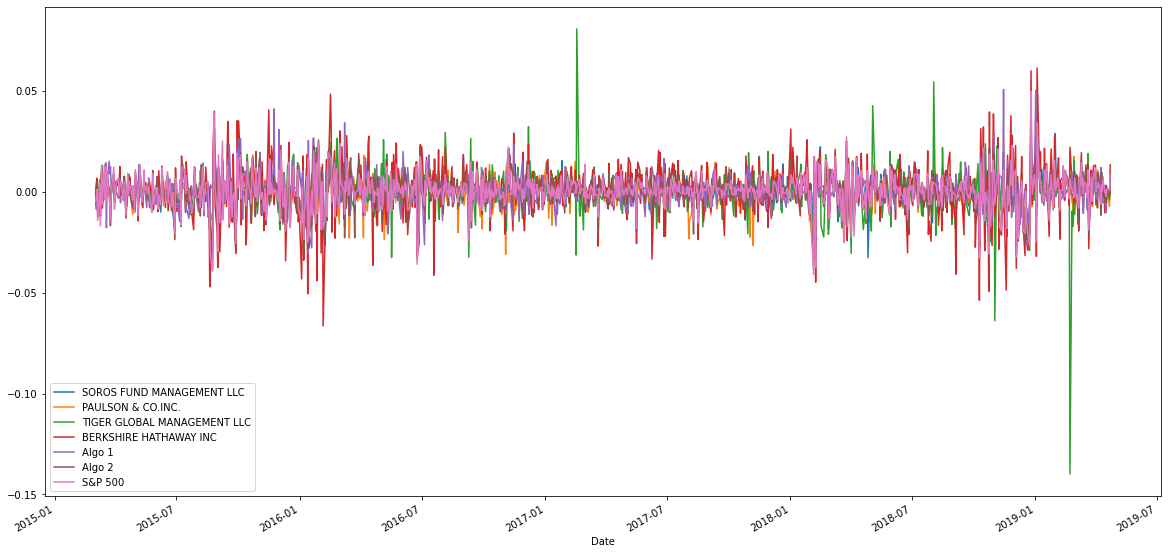

In [16]:
# Plot daily returns
all_daily_returns_df.plot(figsize = (20,10))

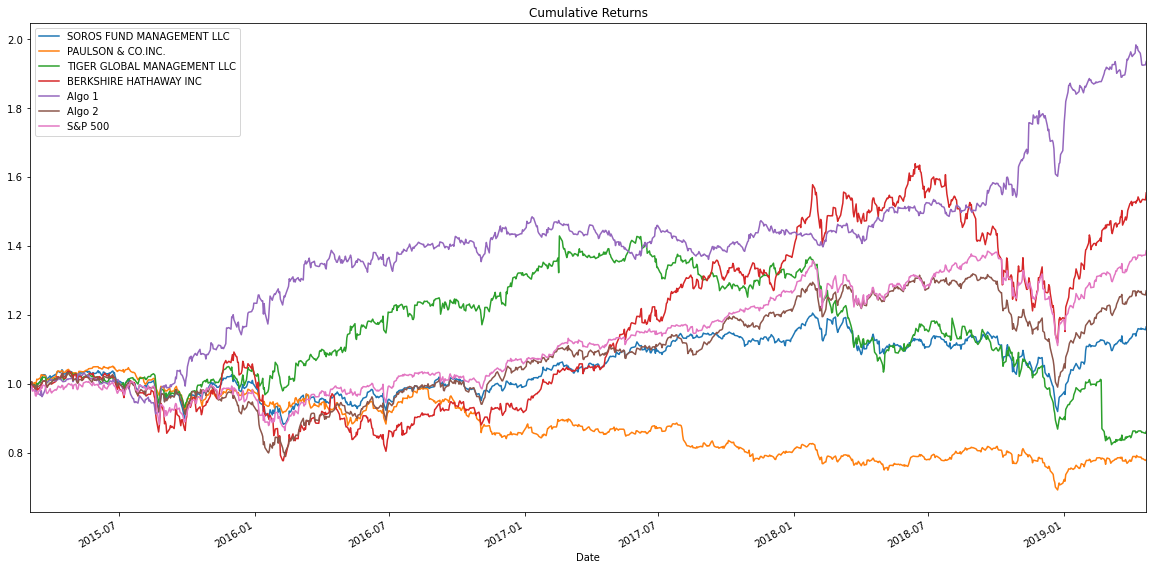

In [17]:
# Plot cumulative returns
cumulative_returns_df = (1+ all_daily_returns_df).cumprod()
cumulative_returns_df.plot(xlim=('2015-03-03', '2019-04-23'),figsize=(20,10), title='Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

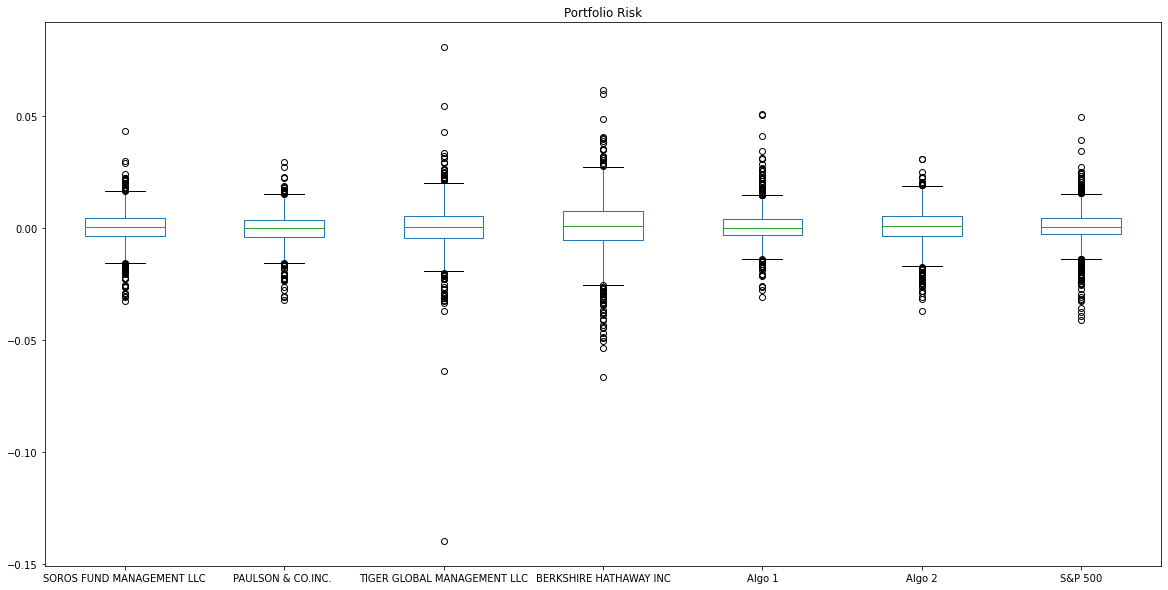

In [18]:
# Box plot to visually show risk
all_daily_returns_df.plot(kind = "box", figsize = (20,10), title = 'Portfolio Risk')

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
#Tiger Global Management LLC & Bershire Hathaway Inc are both riskier than the S&P 500
daily_std_df = pd.DataFrame(all_daily_returns_df.std()).rename(columns = {0:"std"})

In [20]:
# Determine which portfolios are riskier than the S&P 500
sp500_std = all_daily_returns_df['S&P 500'].std()
all_daily_returns_df.std()>sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = daily_std_df*np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

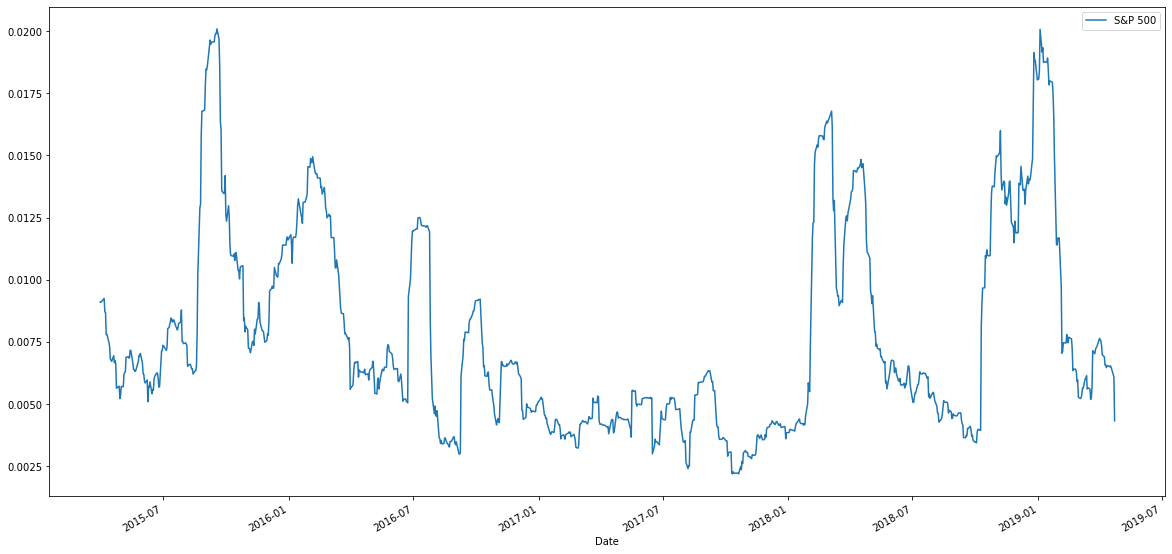

In [22]:
# Calculate and plot the rolling standard deviation for
sp500_rolling21_df = all_daily_returns_df[["S&P 500"]].rolling(window = 21).std()
sp500_rolling21_df.plot(figsize = (20,10))

In [23]:
# Construct a correlation table
sp500_correlation_df = pd.DataFrame(all_daily_returns_df.corr()).loc[:,"S&P 500"] 
sp500_correlation_df

SOROS FUND MANAGEMENT LLC      0.837864
PAULSON & CO.INC.              0.669732
TIGER GLOBAL MANAGEMENT LLC    0.623946
BERKSHIRE HATHAWAY INC         0.751371
Algo 1                         0.279494
Algo 2                         0.858764
S&P 500                        1.000000
Name: S&P 500, dtype: float64

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covar_tgm = all_daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].cov(all_daily_returns_df['S&P 500'])
sp500_var = all_daily_returns_df['S&P 500'].var()
tgm_beta = covar_tgm / sp500_var

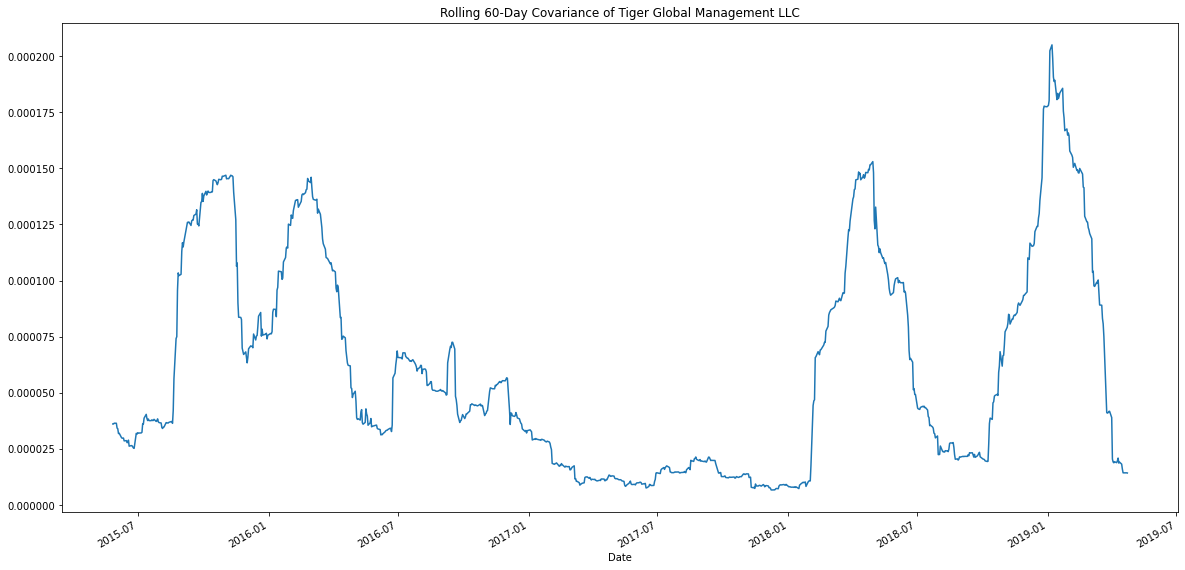

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_covariance = all_daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(all_daily_returns_df['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Tiger Global Management LLC')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (all_daily_returns_df.mean() * 252) / (all_daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

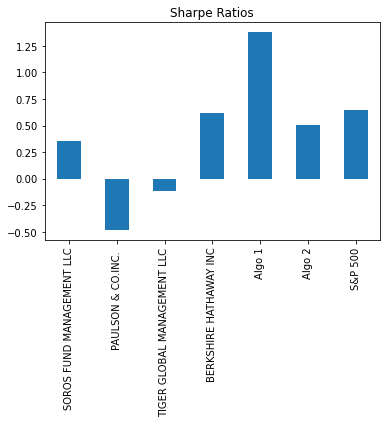

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
csv_path_goog = Path('google stock.csv')

goog_data = pd.read_csv(csv_path_goog, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_data.index = goog_data.index.date
goog_data['Ticker']='GOOG'
goog_data.head()

,Close,Ticker
2019-01-02,1045.85,GOOG
2019-01-03,1016.06,GOOG
2019-01-04,1070.71,GOOG
2019-01-07,1068.39,GOOG
2019-01-08,1076.28,GOOG


In [29]:
# Read the second stock
csv_path_aapl = Path('AAPL Stock.csv')
aapl_data = pd.read_csv(csv_path_aapl, index_col='Date', parse_dates=True, infer_datetime_format=True)
aapl_data.index = aapl_data.index.date
aapl_data['Ticker']='AAPL'
aapl_data.head()

,Close,Ticker
2019-01-02,39.48,AAPL
2019-01-03,35.55,AAPL
2019-01-04,37.07,AAPL
2019-01-07,36.98,AAPL
2019-01-08,37.69,AAPL


In [30]:
# Read the third stock
csv_path_cost = Path('Costco Stock.csv')
cost_data = pd.read_csv(csv_path_cost, index_col='Date', parse_dates=True, infer_datetime_format=True)
cost_data.index = cost_data.index.date
cost_data['Ticker']='COST'
cost_data.head()

,Close,Ticker
2019-01-02,204.76,COST
2019-01-03,200.42,COST
2019-01-04,206.24,COST
2019-01-07,207.00,COST
2019-01-08,208.55,COST


In [31]:
# Concatenate all stocks into a single DataFrame
full_portfolio_df = pd.concat([goog_data,aapl_data,cost_data], axis = "rows",join = "inner")
full_portfolio_df.head()

,Close,Ticker
2019-01-02,1045.85,GOOG
2019-01-03,1016.06,GOOG
2019-01-04,1070.71,GOOG
2019-01-07,1068.39,GOOG
2019-01-08,1076.28,GOOG


In [32]:
# Reset the index
full_portfolio_df.reset_index(inplace=True)
full_portfolio_df = full_portfolio_df.rename(columns={'index': 'Trade DATE'})
full_portfolio_df.head()

,Trade DATE,Close,Ticker
0,2019-01-02,1045.85,GOOG
1,2019-01-03,1016.06,GOOG
2,2019-01-04,1070.71,GOOG
3,2019-01-07,1068.39,GOOG
4,2019-01-08,1076.28,GOOG


In [33]:
# Pivot so that each column of prices represents a unique symbol
full_portfolio_pivot = full_portfolio_df.pivot(index='Trade DATE', columns='Ticker', values='Close')
full_portfolio_pivot.head()

Ticker,AAPL,COST,GOOG
Trade DATE,,,
2019-01-02,39.48,204.76,1045.85
2019-01-03,35.55,200.42,1016.06
2019-01-04,37.07,206.24,1070.71
2019-01-07,36.98,207.00,1068.39
2019-01-08,37.69,208.55,1076.28


In [34]:
# Drop Nulls
full_portfolio_pct = full_portfolio_pivot.pct_change()
full_portfolio_pct.dropna(inplace=True)
full_portfolio_copy = full_portfolio_pct.copy()
full_portfolio_pct.head()

Ticker,AAPL,COST,GOOG
Trade DATE,,,
2019-01-03,-0.099544,-0.021196,-0.028484
2019-01-04,0.042757,0.029039,0.053786
2019-01-07,-0.002428,0.003685,-0.002167
2019-01-08,0.019200,0.007488,0.007385
2019-01-09,0.016981,0.006473,-0.001505


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
full_portfolio_weighted = full_portfolio_pct.dot(weights)
full_portfolio_weighted

Trade DATE
2019-01-03   -0.049741
2019-01-04    0.041861
2019-01-07   -0.000303
2019-01-08    0.011357
2019-01-09    0.007316
                ...   
2020-09-24    0.005715
2020-09-25    0.008259
2020-09-28    0.014806
2020-09-29   -0.000120
2020-09-30    0.007733
Length: 440, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
#all_daily_returns_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500', 'Custom']
all_daily_returns_df['Custom'] = full_portfolio_weighted
all_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000306
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001595


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_daily_returns_df.dropna(inplace=True)
all_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.049741
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.041861
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,-0.000303
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.011357
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,0.007316
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000306
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001595


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
all_combined_returns_std = all_daily_returns_df.std()
all_combined_returns_std.sort_values(ascending = True)

Algo 1                         0.005730
PAULSON & CO.INC.              0.006958
SOROS FUND MANAGEMENT LLC      0.007471
Algo 2                         0.007657
S&P 500                        0.007886
Custom                         0.011978
BERKSHIRE HATHAWAY INC         0.012868
TIGER GLOBAL MANAGEMENT LLC    0.018262
dtype: float64

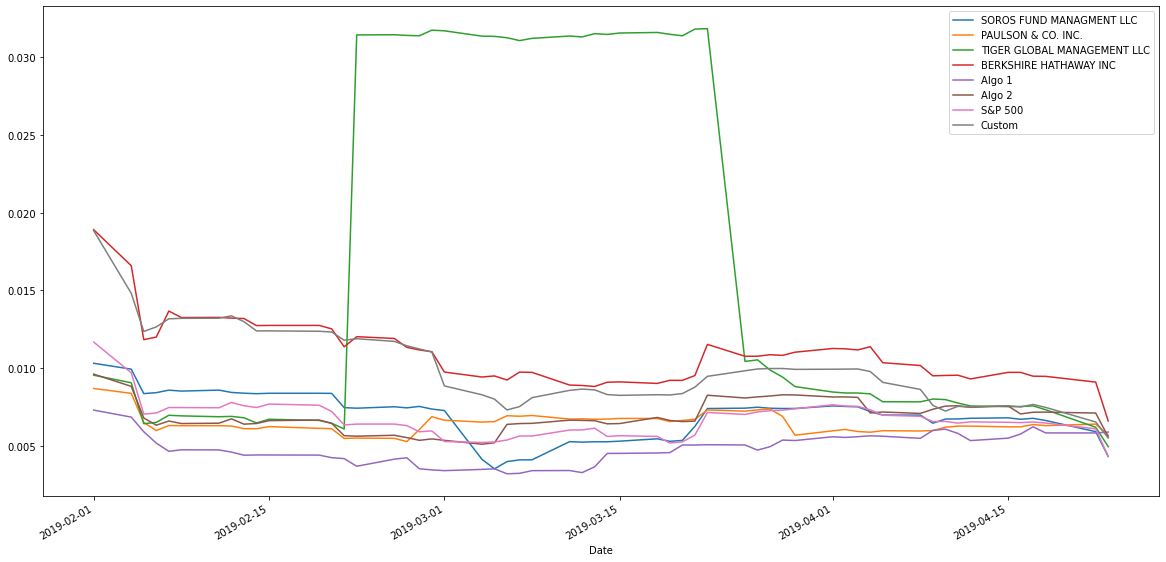

In [39]:
# Rolling
ax =all_daily_returns_df.rolling(window=21).std().plot(figsize=(20,10))


ax.legend(['SOROS FUND MANAGMENT LLC', 
           'PAULSON & CO. INC.', 
           'TIGER GLOBAL MANAGEMENT LLC', 
           'BERKSHIRE HATHAWAY INC',
           'Algo 1',
           'Algo 2',
           'S&P 500',
           'Custom'])

In [40]:
# Annualized Sharpe Ratios
all_combined_returns_std = all_daily_returns_df.std() * np.sqrt(252)
all_combined_returns_std.sort_values(ascending = True)

Algo 1                         0.090959
PAULSON & CO.INC.              0.110450
SOROS FUND MANAGEMENT LLC      0.118600
Algo 2                         0.121544
S&P 500                        0.125190
Custom                         0.190137
BERKSHIRE HATHAWAY INC         0.204273
TIGER GLOBAL MANAGEMENT LLC    0.289903
dtype: float64

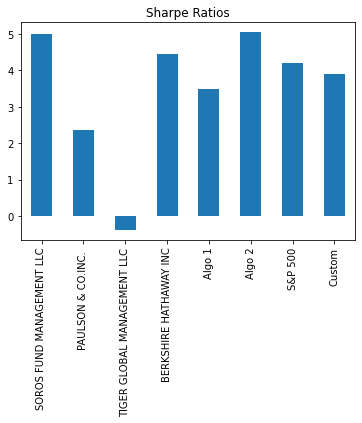

In [41]:
# Visualize the sharpe ratios as a bar plot
all_daily_returns_sharpe = (all_daily_returns_df.mean()*252)/(all_daily_returns_df.std()*np.sqrt(252))
all_daily_returns_sharpe.plot(kind="bar", title="Sharpe Ratios")

In [42]:
# Create a correlation analysis
correlation_analysis = all_daily_returns_df.corr()
correlation_analysis.round(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.749951,0.356923,0.741391,0.091970,0.807262,0.789750,0.613344
PAULSON & CO.INC.,0.749951,1.000000,0.268720,0.618347,0.147312,0.737247,0.699920,0.530522
TIGER GLOBAL MANAGEMENT LLC,0.356923,0.268720,1.000000,0.135657,0.022687,0.198111,0.248452,0.174779
BERKSHIRE HATHAWAY INC,0.741391,0.618347,0.135657,1.000000,0.166761,0.779560,0.872547,0.775148
Algo 1,0.091970,0.147312,0.022687,0.166761,1.000000,0.118447,0.125966,0.051612
Algo 2,0.807262,0.737247,0.198111,0.779560,0.118447,1.000000,0.877848,0.679626
S&P 500,0.789750,0.699920,0.248452,0.872547,0.125966,0.877848,1.000000,0.843191
Custom,0.613344,0.530522,0.174779,0.775148,0.051612,0.679626,0.843191,1.000000


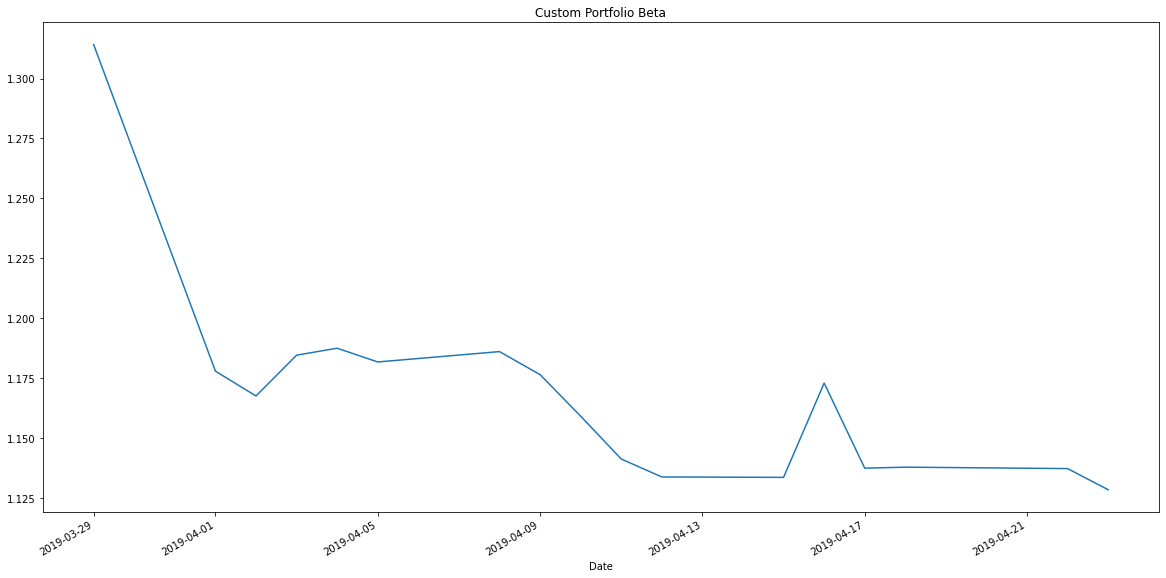

In [43]:
# Beta
rolling_covariance_2 = all_daily_returns_df['Custom'].rolling(window=60).cov(all_daily_returns_df['S&P 500'])
rolling_variance_2 = all_daily_returns_df['S&P 500'].rolling(window=60).var()
rolling_beta_custom = rolling_covariance_2 / rolling_variance_2
rolling_beta_custom.plot(figsize=(20, 10), title='Custom Portfolio Beta')